In [1]:


# Import of keras model for CNN
import tensorflow as tf
import tensorflow.keras
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Dense, Input, InputLayer
#Image handling libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import random as rn
#Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import os

In [2]:
imagepaths = []
#I have imported datasets locally and ran,So the path is set to local folders
for dirname, _, filenames in os.walk('C:\\Users\\Anvesh\\Desktop\\nanodegree projects\\final proj\\pothole_detection_dataset\\'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        imagepaths.append(path)

def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        try:
            path = os.path.join(DIR,img)
            #read images
            img = cv2.imread(path,cv2.IMREAD_COLOR)
            #resize the images based on specifications
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            X.append(np.array(img))
            Z.append(str(label))
        except:
            pass
        
def assign_label(img,label):
    return label


In [3]:
IMG_SIZE=224 # images size used
X=[]
y=[]
for image in imagepaths:
    try:
        img = cv2.imread(image,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))

        X.append(np.array(img))
        if(image.startswith('C:\\Users\\Anvesh\\Desktop\\nanodegree projects\\final proj\\pothole_detection_dataset\\normal')):
            y.append('NORMAL')
        else:
            y.append('POTHOLES')
    except:
        pass

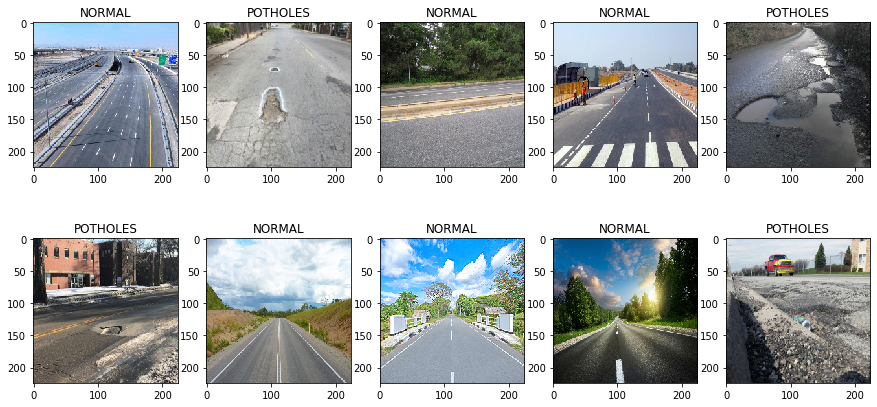

In [4]:

fig,ax=plt.subplots(2,5)
plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0)
fig.set_size_inches(15,15)

for i in range(2):
    for j in range (5):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(X[l][:,:,::-1])
        ax[i,j].set_title(y[l])
        ax[i,j].set_aspect('equal')

In [5]:

# label encoder and splitting the dataset to training and testing sets(25% of total is testing set)  
le=LabelEncoder()
Y=le.fit_transform(y)
Y=to_categorical(Y,2)
print(Y)
X=np.array(X)
#X=X/255

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=5)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [6]:
#Shapes of test and train datasets
#training Samples: 510
#testing samples: 170
print(x_test[0].shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(224, 224, 3)
(510, 224, 224, 3)
(170, 2)
(510, 2)


In [7]:

# creating a sequential model and adding layers to the model
cnn4 = Sequential()
cnn4.add(InputLayer(input_shape=(224,224,3)))
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(2, activation='softmax'))
# need two classes as output(potholes and normal). So the output size is 2
cnn4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
#Printing out the model summary
cnn4.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 222, 222, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 220, 220, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      1

In [9]:
#Training the train dataset and validating against test samples and recording accuracy and loss for each Epoch
cnn4.fit(x_train, y_train, epochs=40, batch_size=20, verbose=2,validation_data=(x_test, y_test))

Train on 510 samples, validate on 170 samples
Epoch 1/40
510/510 - 135s - loss: 0.6389 - accuracy: 0.7569 - val_loss: 1.8902 - val_accuracy: 0.6176
Epoch 2/40
510/510 - 134s - loss: 0.4226 - accuracy: 0.8549 - val_loss: 0.6176 - val_accuracy: 0.7706
Epoch 3/40
510/510 - 137s - loss: 0.3581 - accuracy: 0.8647 - val_loss: 1.7391 - val_accuracy: 0.6941
Epoch 4/40
510/510 - 142s - loss: 0.2956 - accuracy: 0.8980 - val_loss: 0.7704 - val_accuracy: 0.7941
Epoch 5/40
510/510 - 144s - loss: 0.2237 - accuracy: 0.9137 - val_loss: 5.7673 - val_accuracy: 0.5529
Epoch 6/40
510/510 - 144s - loss: 0.4657 - accuracy: 0.8255 - val_loss: 3.0517 - val_accuracy: 0.6059
Epoch 7/40
510/510 - 147s - loss: 0.3123 - accuracy: 0.8824 - val_loss: 0.9438 - val_accuracy: 0.7941
Epoch 8/40
510/510 - 144s - loss: 0.2479 - accuracy: 0.9118 - val_loss: 0.9952 - val_accuracy: 0.7588
Epoch 9/40
510/510 - 144s - loss: 0.1571 - accuracy: 0.9373 - val_loss: 0.5639 - val_accuracy: 0.8118
Epoch 10/40
510/510 - 143s - loss: 0

In [10]:
loss, accuracy = cnn4.evaluate(x_test, y_test)

print('Test accuracy: {:2.2f}%'.format(accuracy*100))

170/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [11]:
# Making predictions on test data
x_test = tf.cast(x_test, tf.float32)
prediction = cnn4.predict(x_test)

In [12]:
#Transform predictions into 1D array 
y_pred = np.argmax(prediction, axis=1)

In [13]:
y_test1=y_test.astype(int)
y_test2=[]
for i in y_test1:
    a=1
    #print(i[0],i[1])
    if(i[0]==1 and i[1]==0):
        a=0
    y_test2.append(a)

In [14]:
#Create a Confusion Matrix for Evaluation
# H = Horizontal
# V = Vertical
pd.DataFrame(confusion_matrix(y_test2, y_pred),columns=["Predicted NORMAL", "Predicted POTHOLES"],index=["Actual NORMAL", "Actual POTHOLES"])

,Predicted NORMAL,Predicted POTHOLES
Actual NORMAL,77,5
Actual POTHOLES,6,82


In the benchmark model, accuracy has reached 89% but using my model, accuracy has reached to 93%. Future imporvement would run the model on large dataset. and may be implement the model learning on the map. The map could use the information and recommend the route efficiency for the users.

References:


https://www.kaggle.com/pradneshmhatre/pothole-detector-with-keras

https://www.pothole.info/the-facts/

https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d

https://stackabuse.com/image-classification-with-transfer-learning-and-pytorch/


    